### Data Cleaning
In real time, data will might be very messing, so before feeding the data in machine learning model we first we to do data cleaning. Feature Engineering is something that will help us in data cleaning

### Outliers

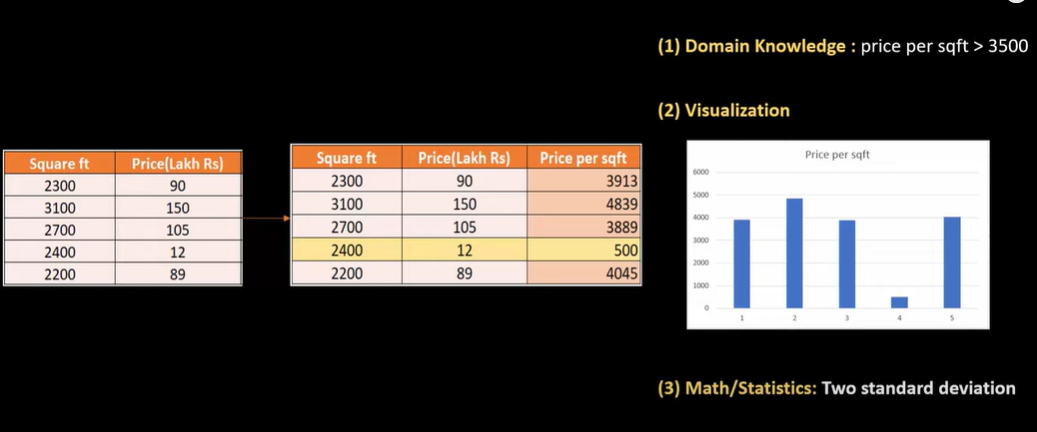

### Handling missing values

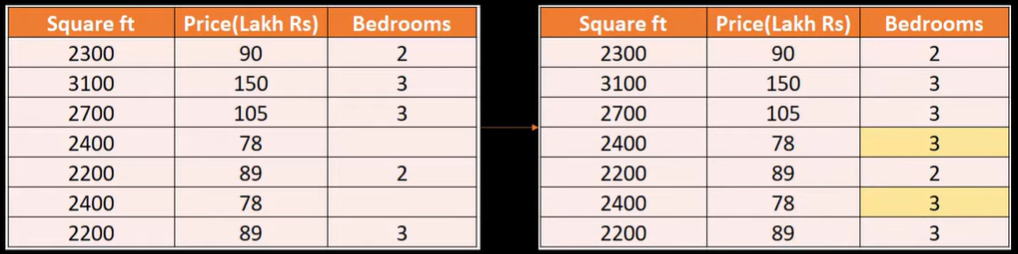

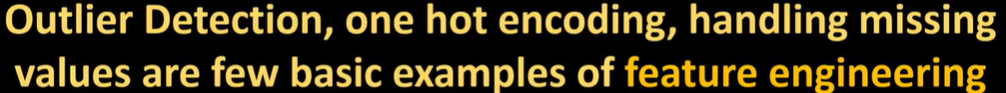

Feature engineering is a process of extracting useful features from raw data using math, statistics and domain knowledge

### Remove outliers from simple dataset having name and height
the idea is simple, we will going to use the percentile feature of pandas dataframe
or if we are having some domain knowledge like here we know that an adult person height will not be more than 7 or 7.5 foot so we can simply ignore the height above this

but in real example where we deal with actual problem we will not have actual domain knwoledge so at that time using percentile .quantile() is very useful

In [1]:
import pandas as pd

df=pd.read_csv('heights.csv')
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [3]:
# .quantile() will give us the percentile value
# here, we are only extracting the value having more than 0.95 percentile
max_threshold=df['height'].quantile(0.95)
max_threshold

9.689999999999998

In [5]:
df[df['height']>max_threshold]

,name,height
9,imran,14.5


In [6]:
min_threshold=df['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [7]:
df[df['height']<min_threshold]

,name,height
12,yoseph,1.2


In [12]:
df=df[(df['height']<max_threshold) & (df['height']>min_threshold)]
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


### Removing outliers from Bangalore dataset

In [32]:
import pandas as pd

df=pd.read_csv('bangalore_data.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [33]:
df.shape

(13200, 7)

here meaning, 75% of sample are having total sqft of less than 1672 sqft 

In [34]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [35]:
# getting min and max threshold percentile
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001,0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [36]:
df=df[(df['price_per_sqft']<max_threshold) &(df['price_per_sqft']>min_threshold)]
df.shape

(13172, 7)

In [37]:
# using std
upper_limit_std=df.price.mean()+4*df.price.std()
lower_limit_std=df.price.mean()-4*df.price.std()

df1=df[(df.price<upper_limit_std) & (df.price>lower_limit_std)]
df1.shape

(13054, 7)

In [38]:
# using zscore
df['zscore']=(df.price-df.price.mean())/df.price.std()

df2=df[(df.zscore<4) & (df.zscore>-4)]
df2.shape

(13054, 8)

### Removing outliers from Airbnb new york city dataset based on price per night

In [23]:
import pandas as pd

df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [24]:
df.shape

(48895, 16)

In [25]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [26]:
min_threshold, max_threshold =df.price.quantile([0.01,0.999])
min_threshold, max_threshold

(30.0, 3000.0)

In [27]:
df=df[(df['price']<max_threshold) & (df['price']>min_threshold)]
df.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46476,35266709,A room in 3-bedroom apartment,264296595,Hyunsung,Queens,Flushing,40.75926,-73.82641,Shared room,75,1,1,2019-07-08,1.00,3,349
40661,31541068,"Bright Guest Room in Fort Greene, BK",115252929,Duaa,Brooklyn,Fort Greene,40.68431,-73.97209,Private room,65,1,9,2019-06-23,2.87,1,157
14049,10730086,Spacious Brooklyn Room for Travelers,28546873,Justin,Brooklyn,Bedford-Stuyvesant,40.68995,-73.92844,Private room,45,3,9,2019-03-20,0.34,1,80
10455,8011605,"Sunny, Clean, Safe, Zen!",42295490,C-S,Manhattan,Chinatown,40.71608,-73.99425,Private room,72,4,12,2019-05-11,0.25,2,0
17010,13513738,"Large, bright, 2bdr Manhattan apt",74330820,Rachel,Manhattan,East Harlem,40.81454,-73.93616,Entire home/apt,130,4,6,2018-07-30,0.16,2,0
20987,16618113,Private Room in 2BR in Hip East Williamsburg,2887101,Kerry,Brooklyn,Williamsburg,40.70762,-73.94221,Private room,47,3,2,2017-01-17,0.07,1,0
39921,31023868,"Bright, charming Fort Greene studio",108810117,Jaclyn,Brooklyn,Fort Greene,40.68941,-73.98098,Entire home/apt,175,3,4,2019-07-07,0.63,1,9
39680,30890018,Private room in brand new apartment in HK,4491717,Goran,Manhattan,Hell's Kitchen,40.76132,-73.99443,Private room,180,3,1,2019-01-01,0.16,1,341
6151,4500615,"Chelsea, balcony and 2 bedrooms!",6519939,Raj,Manhattan,Chelsea,40.75005,-73.99718,Entire home/apt,320,3,0,NaN,NaN,1,0
42955,33362399,Charming 2 bedroom apartment in Manhattan,1692538,Nuttamon,Manhattan,Washington Heights,40.85476,-73.93094,Private room,196,1,6,2019-06-23,3.53,5,336


In [28]:
df.price.describe()

count    48183.000000
mean       148.772036
std        153.594795
min         31.000000
25%         70.000000
50%        110.000000
75%        179.000000
max       2999.000000
Name: price, dtype: float64

Learning: https://www.mathsisfun.com/data/index.html

### Using standard deviation to remove outliers

In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

df=pd.read_csv("heights (1).csv")
df.sample(5)

,gender,height
4338,Male,70.693761
5878,Female,59.264412
7781,Female,64.747515
2892,Male,64.571017
6833,Female,59.922162


In [8]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

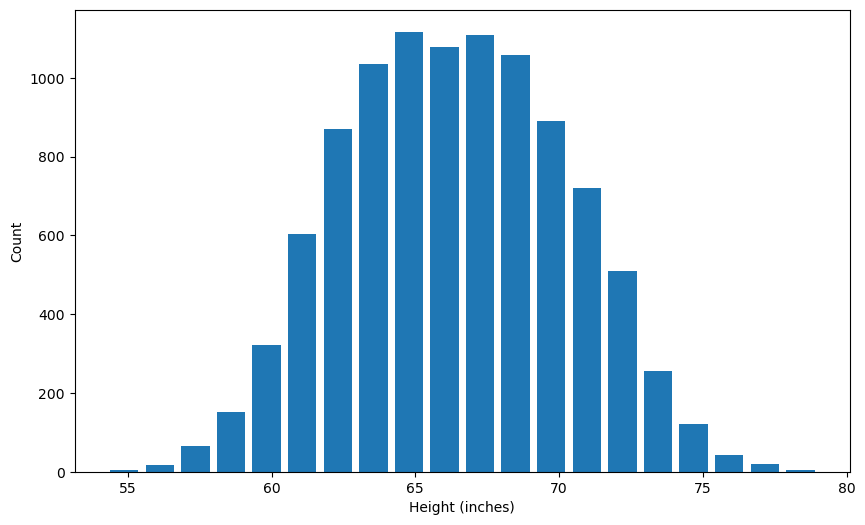

In [4]:
# plotting histogram
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

it shows that the distribution is normal

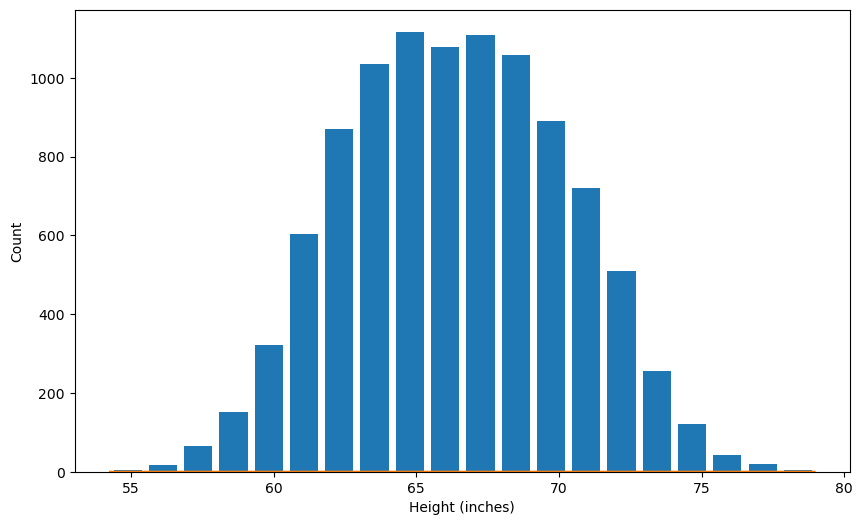

In [7]:
# making bell curve
from scipy.stats import norm
import numpy as np

plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

# plotting bell curve
rng=np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [9]:
df.height.mean()

66.367559754866

standard deviation is basically showing you how far away the data point is from mean value

In [10]:
df.height.std()

3.847528120795573

here we are going to use 3 standard deviation to remove the outliers. this we need to figure out based on our dataset that how much standard deviation 2,3,4,5 we will be going to take for outliers

In [11]:
upper_limit=df.height.mean()+3*df.height.std()
upper_limit

77.91014411725271

In [12]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392479274

so anything more than upper limit and less than lower limit, we are going to make them as outliers

In [13]:
# data points outliers
df[(df['height']>upper_limit) | (df['height']<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [14]:
df_no_outliers_std=df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outliers_std.shape

(9993, 2)

### Using z-score to remove outliers
alternative way of doing the same thing that we did above using standard deviation and in similar way

z-score tells us a number that show how many standard deviation we are away from mean

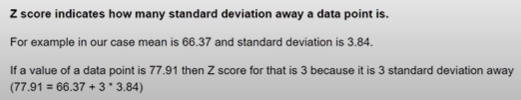

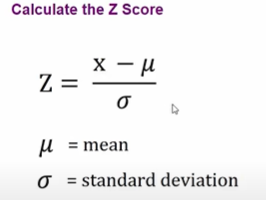

In [15]:
df['zscore']=(df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [16]:
df[df.zscore>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [18]:
df[df.zscore<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [19]:
df[(df.zscore>3)|(df.zscore<-3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [21]:
df_no_outliers_zscore=df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers_zscore.shape

(9993, 3)